# COMPUTER VISION AND PATTERN RECOGNITION PROJECT
## Alessandro Cesa

In [72]:
import torch
from torch import nn
import torch.optim as optim
from torch.utils.data import DataLoader,ConcatDataset
from torchvision.datasets import ImageFolder
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import time
from sklearn.metrics import confusion_matrix
import seaborn as sn
import pandas as pd

In [73]:
#Run if you don't already have the dataset
%%capture
!git clone https://github.com/AlessandroCesaTs/Computer_Vision_Project_Cesa.git

In [74]:
#Adjust according to your path
import sys
sys.path.append('/content/Computer_Vision_Project_Cesa/functions')

from image_handling_functions import *
from train_test_functions import *
from neural_networks import *

In [75]:
#Adjust according to your path
train_path = "/content/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/train"
test_path = "/content/Computer_Vision_Project_Cesa/CVPR2023_project_2_and_3_data/test"

In [76]:
device = get_default_device()

In [82]:
train=ImageFolder(root=train_path,transform=resize_transformation)
test=ImageFolder(root=test_path,transform=resize_transformation)

In [102]:
class TransformedDataSet():
    """Wrap a datset (created with imagefolder) to apply a transformation"""
    def __init__(self, ds):
        self.ds = ds
        self.transformation=transforms.RandomHorizontalFlip(1)

    def __getitem__(self, index):
        """Get a sample from the dataset at the given index"""
        img, label = self.ds[index]

        # Apply the transformation if it is provided
        if self.transformation:
            img = self.transformation(img)

        return img, label

    def __len__(self):
        """Number of batches"""
        return len(self.ds)


In [80]:
%%capture
"""
# check the dataset size
print(f"Train size: {len(train)}")
print(f"Test size: {len(test)}")
print(train.classes)
"""

In [ ]:


# get image no. 1 and its label
index=1
img,label=augmented_train[index]

print(f"label: {label}")

print("class: " + train.classes[label])
# display
figure = plt.figure()
plt.imshow(img.numpy().transpose((1, 2, 0)),cmap='gray') #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)


In [6]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()

In [7]:
#split training set into training and validation
train_size=int(0.85*len(train))
validation_size=len(train)-train_size
training_set,validation_set=torch.utils.data.random_split(train,[train_size,validation_size])

In [8]:
# Create data loaders.
# Data loaders are basically objects that make easy to iterate through the data by batches of some batch_size
batch_size = 32
train_loader = DataLoader(training_set, batch_size=batch_size,shuffle=True,pin_memory=True)
validation_loader = DataLoader(validation_set, batch_size=batch_size,shuffle=False,pin_memory=True)
test_loader = DataLoader(test, batch_size=batch_size,shuffle=False,pin_memory=True)

In [9]:
train_loader = DeviceDataLoader(train_loader, device)
validation_loader = DeviceDataLoader(validation_loader, device)
test_loader = DeviceDataLoader(test_loader, device)

In [109]:
%%capture
"""
for X, y in test_loader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break
"""

Shape of X [N, C, H, W]: torch.Size([32, 1, 64, 64])
Shape of y: torch.Size([32]) torch.int64


torch.Size([32, 1, 64, 64])
LivingRoom Office Suburb Industrial Coast Forest InsideCity OpenCountry Highway OpenCountry TallBuilding InsideCity Coast Kitchen Office Kitchen Coast Suburb InsideCity LivingRoom Mountain Forest Forest Store Kitchen Mountain OpenCountry Highway Coast Suburb InsideCity TallBuilding


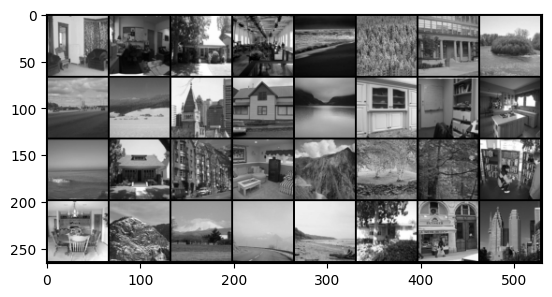

In [118]:
classes=train.classes

# get a batch from the training set
dataiter = iter(train_loader)
images, labels = next(dataiter)   #images is a (batch_size,3,32,32) tensor

print(images.size())

img=torchvision.utils.make_grid(images)
figure = plt.figure()
plt.imshow(img.cpu().numpy().transpose((1, 2, 0)).astype(np.uint8),cmap='gray') #<< swap axes because img is (3,H,W) but imshow() expects (H,W,3)

print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))


In [10]:
# Instantiate the model
model = simpleCNN()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.001,momentum=0.9)
# Print the model summary
#print(model)

In [ ]:
model_path=train_model(model,train_loader,validation_loader,loss_function,optimizer,15,device)

Accuracy of the network on the test images: 26.934673366834172%


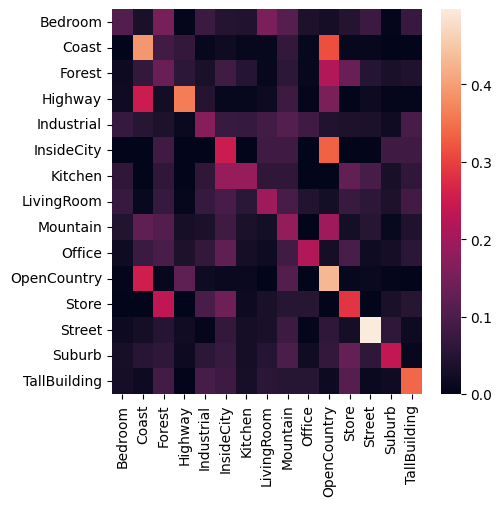

In [12]:
test_model(simpleCNN(),model_path,test_loader,test,device)

In [124]:
!rm model*

In [104]:
augmented_training_set=TransformedDataSet(training_set)
concatenated_dataset = torch.utils.data.ConcatDataset([training_set, augmented_training_set])
augmented_train_loader = DataLoader(concatenated_dataset, batch_size=batch_size,shuffle=True,pin_memory=True)
augmented_train_loader = DeviceDataLoader(augmented_train_loader, device)

In [142]:
np.random.seed(123)
torch.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False
if device.type == 'cuda':
    torch.cuda.empty_cache()

In [148]:
model = simpleCNN()
model.to(device)
model.apply(init_weights)
loss_function=nn.CrossEntropyLoss()
optimizer=optim.SGD(model.parameters(),lr=0.0003,momentum=0.9)

EPOCH1:
LOSS train: 2.707221287488937 validation: 2.708383560180664 | validation_accuracy: 5.777777777777778% 
EPOCH2:
LOSS train: 2.7022754698991776 validation: 2.709625244140625 | validation_accuracy: 7.111111111111111% 
EPOCH3:
LOSS train: 2.6751515328884126 validation: 2.639859199523926 | validation_accuracy: 11.555555555555555% 
EPOCH4:
LOSS train: 2.6066226571798325 validation: 2.596242666244507 | validation_accuracy: 12.88888888888889% 
EPOCH5:
LOSS train: 2.5581503599882125 validation: 2.587296724319458 | validation_accuracy: 14.222222222222221% 
EPOCH6:
LOSS train: 2.5038831532001495 validation: 2.5755388736724854 | validation_accuracy: 15.11111111111111% 
EPOCH7:
LOSS train: 2.473009932041168 validation: 2.5295891761779785 | validation_accuracy: 17.77777777777778% 
EPOCH8:
LOSS train: 2.443676632642746 validation: 2.5274696350097656 | validation_accuracy: 13.333333333333334% 
EPOCH9:
LOSS train: 2.409495571255684 validation: 2.533351182937622 | validation_accuracy: 17.7777777

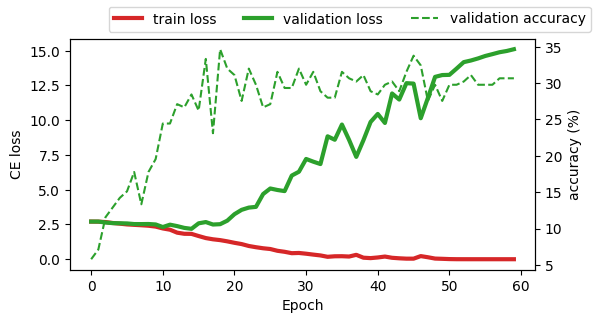

In [149]:
model_path=train_model(model,augmented_train_loader,validation_loader,loss_function,optimizer,60,device)

Accuracy of the network on the test images: 27.403685092127304%


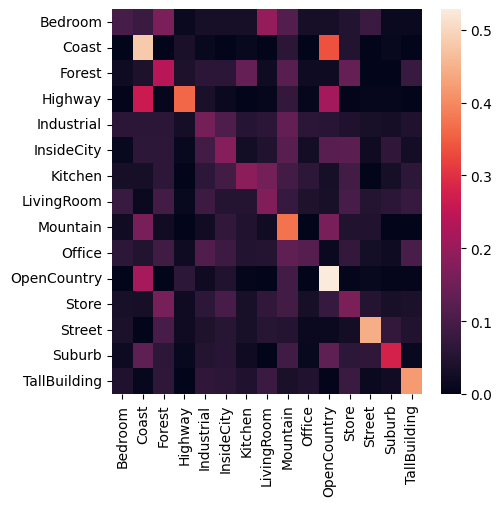

In [150]:
test_model(simpleCNN(),model_path,test_loader,test,device)

In [151]:
!rm model*